In [92]:
from math import log
import pandas as pd
import re
import io
from collections import Counter
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import community
import numpy as np
import nltk
import seaborn as sns
import itertools
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize
import random
import operator
# import louvain
import json, csv
from networkx.algorithms import bipartite
import requests
import PIL
from io import BytesIO
import folium
import imageio
import folium.plugins as plugins
from folium.plugins import FastMarkerCluster

plt.style.use('ggplot')
%matplotlib inline

from tqdm import tnrange, tqdm_notebook

In [93]:
data_Charlotte_friend = pd.read_csv('data_Charlotte_friend.csv')

friend_network = pd.read_csv('friend_network.csv')

In [94]:
a = list(friend_network.business_id)
b = list(data_Charlotte_friend.user_id)

list(set(a) & set(b))

[]

In [95]:
delete_row = data_Charlotte_friend[data_Charlotte_friend.user_id == 'LCEeye3tvTOtcTUg61mf1Q'].index
data_Charlotte_friend = data_Charlotte_friend.drop(delete_row)

# Sentiment analysis on reviews

In [96]:
data_Charlotte_friend['review_length_friend'] = data_Charlotte_friend.reviews.map(len)

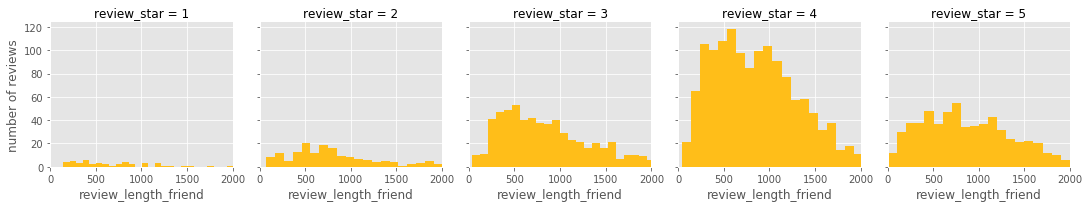

In [97]:
# check how the review lengths are distributed in friend network
d = {'color': ['#ffbe19', '#FFFF33', '#99FF66', '#3399FF', '#9999FF']}
ax = sns.FacetGrid(data = data_Charlotte_friend, hue_kws=d, col='review_star', xlim=(0, 2000)).map(plt.hist,'review_length_friend', bins=50)
ax.axes[0][0].set(ylabel='number of reviews')
#ax.set_titles('Review Length Distribution \n in Friend Network')
ax.savefig('review length distribution for friend network')

Friend Network:

In [7]:
('fnxKfHf-ANBph4EqVARvQQ', 1095),
('QFqtVX-lyZQgVHQrG-dhlg', 1039),
('5PyqkF8zZbfgFDyAcLUehQ', 1038)

('5PyqkF8zZbfgFDyAcLUehQ', 1038)

# Word Cloud

In [33]:
def friend_color_func(word, font_size, position, orientation, random_state=None,
                       **kwargs):
        return "hsl(43, 100%, 55%)"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


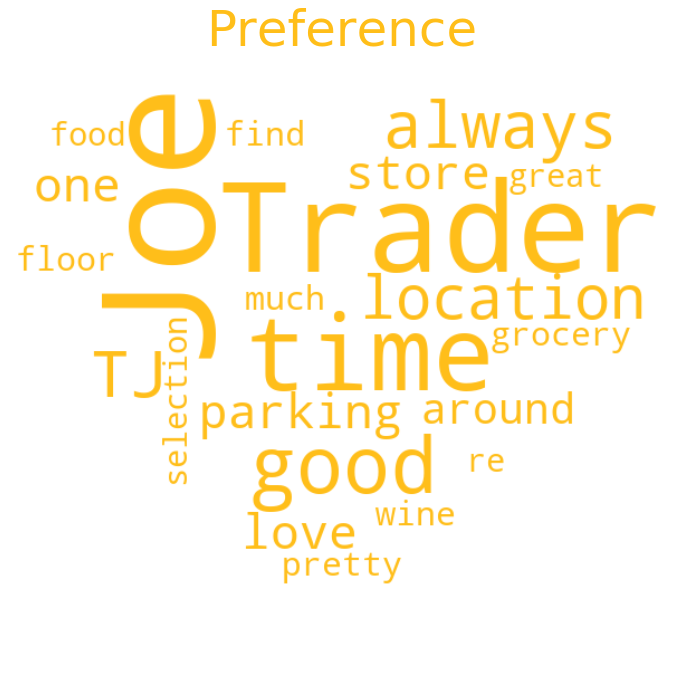

In [34]:
tokenize_data_friend1 = data_Charlotte_friend[data_Charlotte_friend.business_id == 'fnxKfHf-ANBph4EqVARvQQ']

data_frame1 = tokenize_data_friend1.to_csv (r'.\tokenize_data_friend1.csv', index = None, header=True)

tokenize_data_friend1 = pd.read_csv('tokenize_data_friend1.csv')

friend_document1 = []


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_friend1)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_friend1.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    friend_document1 += tokenized
 

import math

friend_doc1=friend_document1
# Term frequency (TF)
freq_friend1 = nltk.FreqDist(friend_doc1)

        
# Unique words for each party

unique_friend1 = set(friend_doc1)
    

friend_tdif1  = []
for n in unique_friend1:
    n_t = 0
    if n in unique_friend1:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    friend_tdif1.append((n, freq_friend1[n]*word_idf))

    

    
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_friend1 = sorted(friend_tdif1, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_friend1[i][1])*(sortedlist_friend1[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = friend_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#FFBE19")
plt.axis("off")
plt.savefig("friend_preference1.png", dpi = 400)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


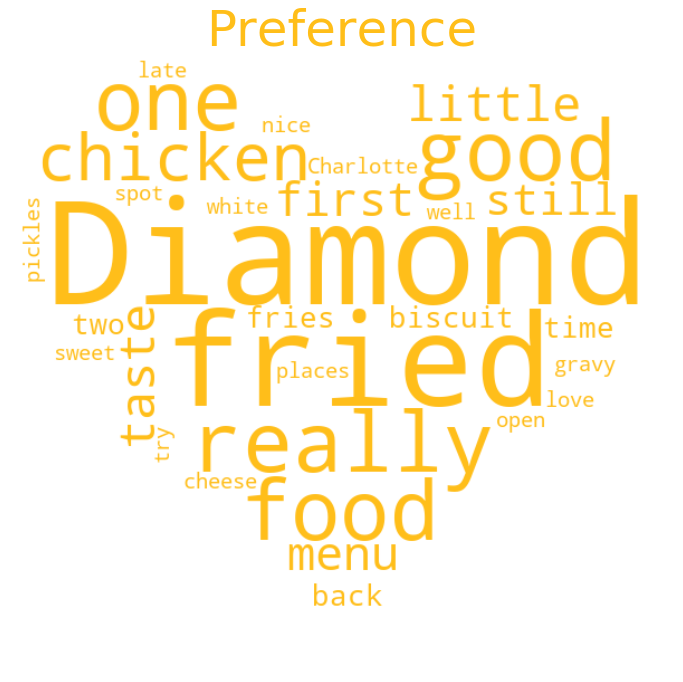

In [35]:
tokenize_data_friend2 = data_Charlotte_friend[data_Charlotte_friend.business_id == 'QFqtVX-lyZQgVHQrG-dhlg']

data_frame2 = tokenize_data_friend2.to_csv (r'.\tokenize_data_friend2.csv', index = None, header=True)

tokenize_data_friend2 = pd.read_csv('tokenize_data_friend2.csv')

friend_document2 = []


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_friend2)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_friend2.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    friend_document2 += tokenized
 

import math

friend_doc2=friend_document2
# Term frequency (TF)
freq_friend2 = nltk.FreqDist(friend_doc2)

        
# Unique words for each party

unique_friend2 = set(friend_doc2)
    

friend_tdif2  = []
for n in unique_friend2:
    n_t = 0
    if n in unique_friend2:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    friend_tdif2.append((n, freq_friend2[n]*word_idf))

    
    
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_friend2 = sorted(friend_tdif2, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_friend2[i][1])*(sortedlist_friend2[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = friend_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#FFBE19")
plt.axis("off")
plt.savefig("friend_preference2.png", dpi = 400)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


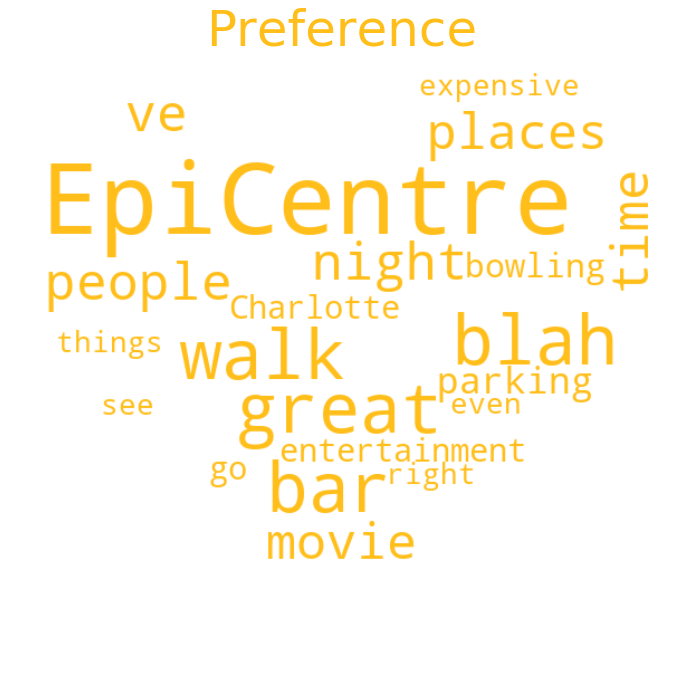

In [36]:
tokenize_data_friend3 = data_Charlotte_friend[data_Charlotte_friend.business_id == '5PyqkF8zZbfgFDyAcLUehQ']

data_frame3 = tokenize_data_friend3.to_csv (r'.\tokenize_data_friend3.csv', index = None, header=True)

tokenize_data_friend3 = pd.read_csv('tokenize_data_friend3.csv')

friend_document3 = []


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_friend3)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_friend3.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    friend_document3 += tokenized
 

import math

friend_doc3=friend_document3
# Term frequency (TF)
freq_friend3 = nltk.FreqDist(friend_doc3)

        
# Unique words for each party

unique_friend3 = set(friend_doc3)
    

friend_tdif3  = []
for n in unique_friend3:
    n_t = 0
    if n in unique_friend3:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    friend_tdif3.append((n, freq_friend3[n]*word_idf))

    
    
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_friend3 = sorted(friend_tdif3, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_friend3[i][1])*(sortedlist_friend3[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = friend_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#FFBE19")
plt.axis("off")
plt.savefig("friend_preference3.png", dpi = 400)
plt.show()

In [37]:
('fnxKfHf-ANBph4EqVARvQQ', 1095),
('QFqtVX-lyZQgVHQrG-dhlg', 1039),
('5PyqkF8zZbfgFDyAcLUehQ', 1038)

('5PyqkF8zZbfgFDyAcLUehQ', 1038)

In [98]:
print(friend_network[friend_network.business_id == '5PyqkF8zZbfgFDyAcLUehQ'].categories.values)

['Shopping Centers, Bars, Restaurants, Nightlife, Shopping']


In [38]:
friend_network[friend_network.business_id == 'fnxKfHf-ANBph4EqVARvQQ']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
386,fnxKfHf-ANBph4EqVARvQQ,"Flowers & Gifts, Florists, Specialty Food, Bee...",Charlotte,1,35.211682,-80.835545,Trader Joe's,167,4.5,"(What's not to love about Trader Joe's, as lon..."


In [39]:
friend_network[friend_network.business_id == 'QFqtVX-lyZQgVHQrG-dhlg']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
409,QFqtVX-lyZQgVHQrG-dhlg,"Diners, American (New), Restaurants, Southern",Charlotte,1,35.219072,-80.813253,Diamond Restaurant,357,3.5,"(When most places are shut down, Diamond Resta..."


In [40]:
friend_network[friend_network.business_id == '5PyqkF8zZbfgFDyAcLUehQ']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
1056,5PyqkF8zZbfgFDyAcLUehQ,"Shopping Centers, Bars, Restaurants, Nightlife...",Charlotte,1,35.22621,-80.842654,The EpiCentre,101,3.5,(I've been to a couple of Yelp events that wer...


In [41]:
friend_data1 = data_Charlotte_friend[data_Charlotte_friend.business_id == 'fnxKfHf-ANBph4EqVARvQQ']
friend_data2 = data_Charlotte_friend[data_Charlotte_friend.business_id == 'QFqtVX-lyZQgVHQrG-dhlg']
friend_data3 = data_Charlotte_friend[data_Charlotte_friend.business_id == '5PyqkF8zZbfgFDyAcLUehQ']
friend_data = pd.concat([friend_data1,friend_data2,friend_data3])

data_frame = friend_data.to_csv (r'.\friend_data.csv', index = None, header=True)

In [42]:
friend_data = pd.read_csv('friend_data.csv')

In [43]:
friend_data.reviews.str.encode('ascii','ignore').str.decode('ascii')

0     What's not to love about Trader Joe's, as long...
1     Seriously, if hell had a parking deck this wou...
2     This Trader Joe's is wonderfully placed in the...
3     Oh TJ's...I love thee. You see, Trader Joe's a...
4     OMG... I thought 9am opening was a national st...
5     First time visiting this store today. Up until...
6     My favorite product from Trader Joe's is froze...
7     I'm still discovering all the great things the...
8     Love Trader Joe's, but this locale is really b...
9     When most places are shut down, Diamond Restau...
10    Reverse angle parking. Still dumb. Still refus...
11    Don't really need to throw in another "Oh, how...
12    There has been a whole lotta buzz about the Di...
13    Been a long time since I was here but today wa...
14    There is some magic in the air about The Diamo...
15    Gotta love the Diamond. \n\nIt's the first pla...
16    I've been to a couple of Yelp events that were...
17    Movies, tanning, booze, yogurt, sushi, bow

In [44]:
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))

In [45]:
# initialize tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()

# define function
def preprocessing(string):
    return tokenizer.tokenize(string.lower())

In [46]:
documents_friend = friend_data.reviews.apply(preprocessing)

In [47]:
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [48]:
friend_data['positive_random'] = documents_friend.apply(count_dictionary,dictionary=positive)
friend_data['negative_random'] = documents_friend.apply(count_dictionary,dictionary=negative)

In [49]:
# import nltk.sentiment
import nltk
nltk.download('vader_lexicon')
import nltk.sentiment
# initialize the vader function
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
# apply the function and convert to dataframe
vader_random = pd.DataFrame(list(friend_data.reviews.apply(vader.polarity_scores)))
# rename columns adding the 'vader_' prefix using a list comprehension
vader_random.columns = ['vader_'+col for col in vader_random.columns]
# merge with original dataframe
friend_data = pd.concat([friend_data,vader_random],axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
from afinn import Afinn #importing one of the methods for sentiment analysis
afinn = Afinn()
friend_data['afinn'] = friend_data.reviews.apply(afinn.score)

C:\Users\WEZHA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\WEZHA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


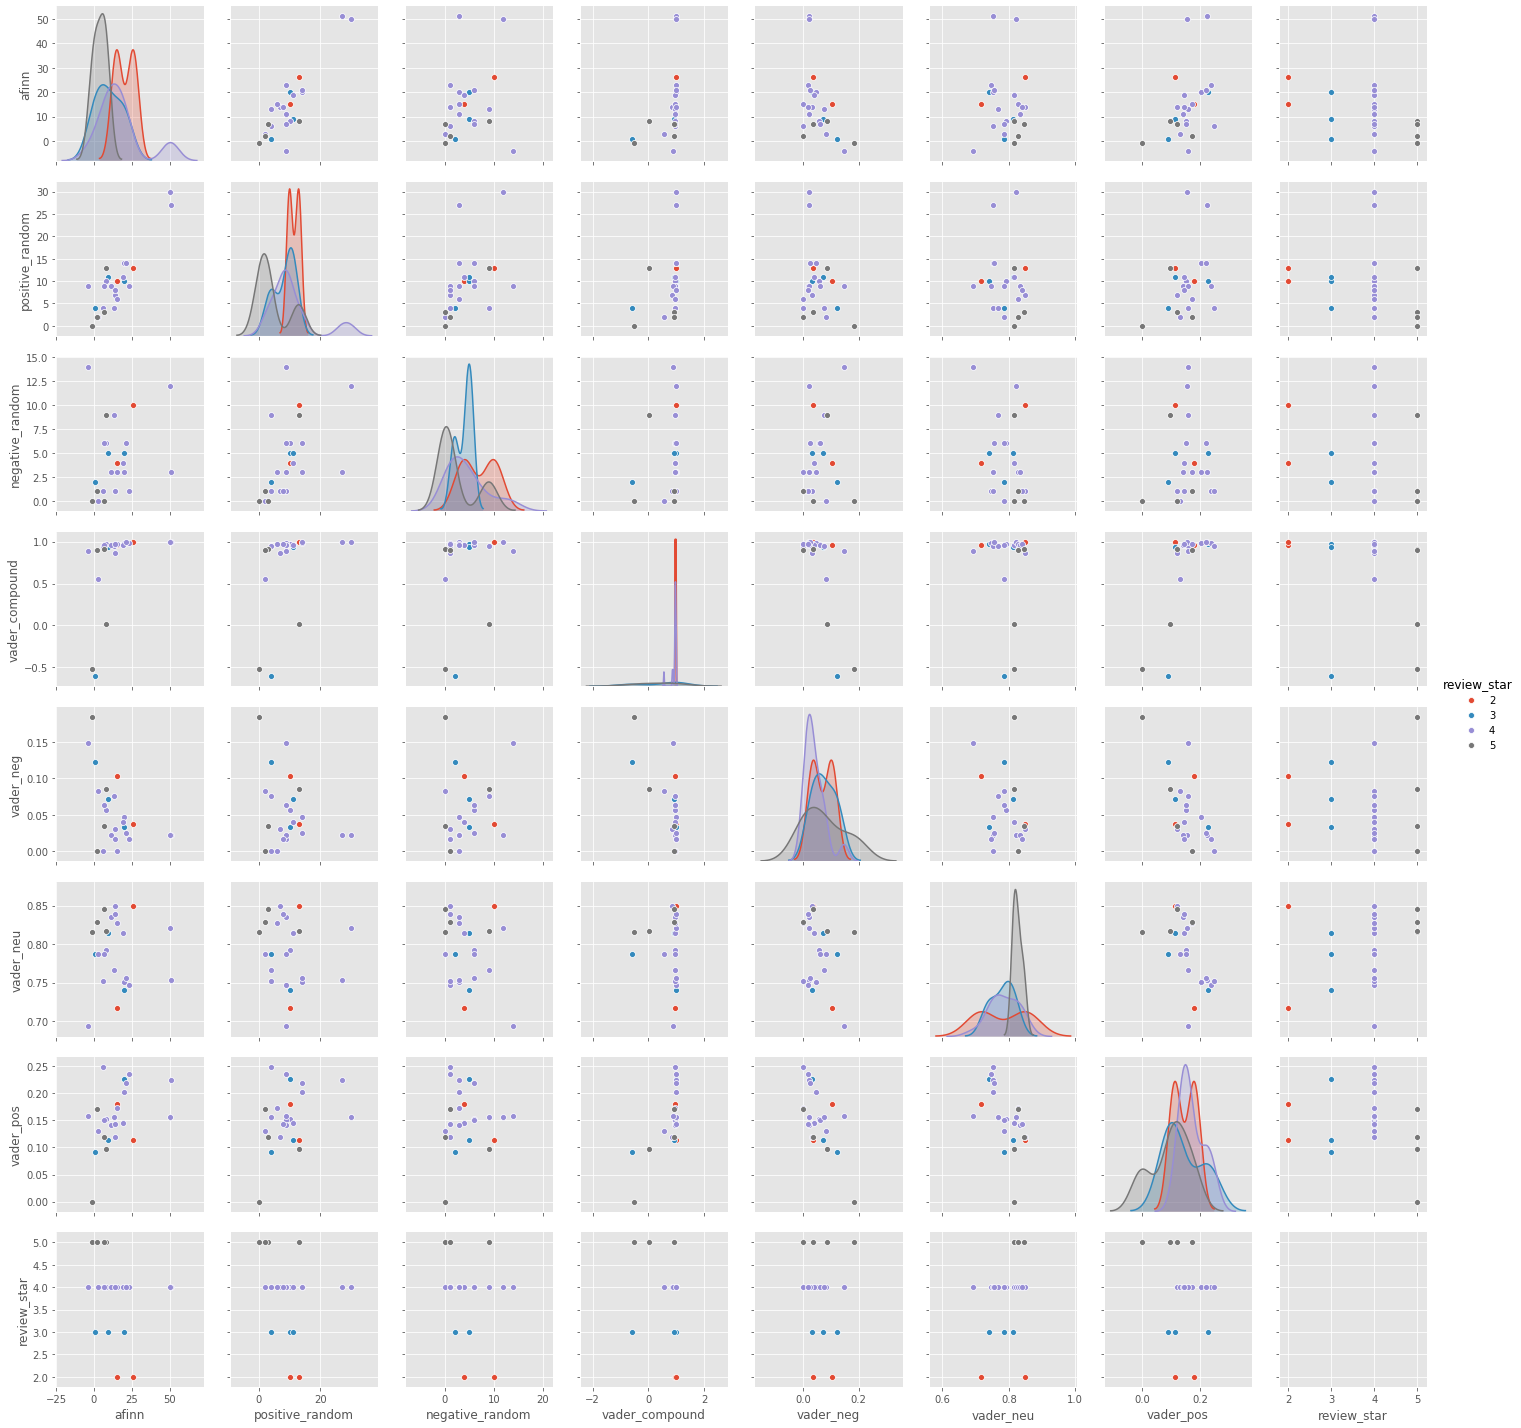

In [53]:
import seaborn as sns

# define columns
sentiment_columns_random = ['afinn','positive_random','negative_random']+[col for col in friend_data.columns if 'vader_' in col]
hue = 'review_star'
sns_plot = sns.pairplot(friend_data[sentiment_columns_random+[hue]],hue=hue)
#plt.title('Vader Review Sentiment Analysis for top 3 node with highest degree in Random Network')

sns_plot.savefig("friend-network.png")

In [55]:
print(len(friend_data))

25


In [ ]:
d = {'color': ['#FF6633 ', '#FFFF33', '#99FF66', '#3399FF', '#9999FF']}

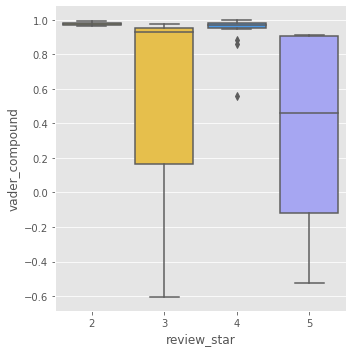

In [81]:
boxplot = sns.catplot(x="review_star", y="vader_compound", kind="box", data=friend_data,palette=sns.color_palette(['#FFFF33', '#FFCC33', '#3399FF', '#9999FF']));
boxplot.savefig("friend_review_boxplot.png")